# 선형회귀분석
종속변수와 하나 이상의 독립변수간의 선형 관계를 모델링하는 방법
* 독립변수가 하나인 경우 단순 선형회귀
* 독립변수가 여러개인 경우 다중선형회귀

# 선형회귀분석 4가지 가정
  * 1) 독립변수-종속변수의 선형성
  * 2) 오차의 정규성 --> shapiro-wilk검정
  * 3) 오차의 등분산성
  * 4) 오차의 독립성 --> 더빈왓슨검정



# 단순 선형회귀분석

In [1]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# 독립변수 : petal_length, 종속변수 : sepal_length 회귀분석 시행

#1.선형성 확인
# 절댓값 크기가 0.7이상 -> 강한 상관관계 / 0.2~0.4이하면 약한 상관관계 / 0.2 이하면 상관관계 없다.
df[['petal_length','sepal_length']].corr()

,petal_length,sepal_length
petal_length,1.000000,0.871754
sepal_length,0.871754,1.000000


In [3]:
X= df[['petal_length']]
y= df['sepal_length']


In [4]:
from statsmodels.formula.api import ols
lr = ols('sepal_length ~ petal_length', data = df).fit()


In [5]:
# 회귀계수
lr.params

Intercept       4.306603
petal_length    0.408922
dtype: float64

In [6]:
# 예측
y_pred = lr.predict(X)
y_pred

0      4.879095
1      4.879095
2      4.838202
3      4.919987
4      4.879095
         ...   
145    6.432999
146    6.351215
147    6.432999
148    6.514784
149    6.392107
Length: 150, dtype: float64

In [10]:
# 평가 (mse, rmse)
# 숫자가 작을수록 좋음
res = y-y_pred
mse = (res**2).sum() / len(y)
import numpy as np
rmse = np.sqrt(mse)

In [11]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.04e-47
Time:                        08:14:07   Log-Likelihood:                -77.020
No. Observations:                 150   AIC:                             158.0
Df Residuals:                     148   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.3066      0.078     54.939      0.000       4.152       4.462
petal_length     0.4089      0.019     21.646      0.000       0.372       0.446
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.346
Skew:                           0.069   Prob(JB):                        0.841
Kurtosis:                       2.809   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#sepal_length = 4.3066 + petal_length * 0.4089

# 다중회귀분석
## 필요 가정
- 독립변수와 종속변수간의 선형성
- 오차의 정규성 --> shapiro.
- 오차의 독립성 --> durbin_watson
- 오차의 등분산성 --> bartlett
- 다중공선성 위배 X --> variance_inflation_factor


In [12]:
# sepal_length를 종속변수, sepal_width, petal_length, petal_width를 종속변수로 하는 다중 회귀분석을 시행
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = 'sepal_length ~ sepal_width + petal_length + petal_width', data = df )
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Tue, 21 May 2024   Prob (F-statistic):           8.59e-62
Time:                        08:22:55   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8560      0.251      7.401      0.000       1.360       2.352
sepal_width      0.6508      0.067      9.765      0.000       0.519       0.783
petal_length     0.7091      0.057     12.502      0.000       0.597       0.821
petal_width     -0.5565      0.128     -4.363      0.000      -0.809      -0.304
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.504
Skew:                           0.007   Prob(JB):                        0.777
Kurtosis:                       2.716   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,sepal_length,petal_length,sepal_width,petal_width
sepal_length,1.000000,0.871754,-0.117570,0.817941
petal_length,0.871754,1.000000,-0.428440,0.962865
sepal_width,-0.117570,-0.428440,1.000000,-0.366126
petal_width,0.817941,0.962865,-0.366126,1.000000


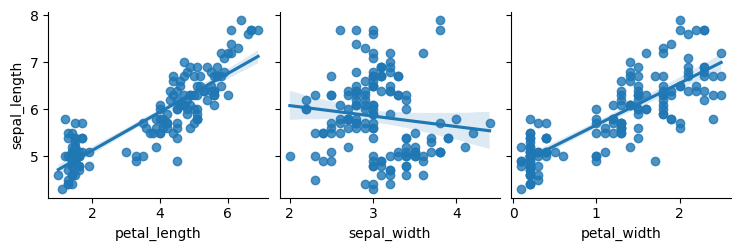

In [16]:
# 1) 독립변수와 종속변수 간 선형성 체크
import seaborn as sns
sns.pairplot(df, x_vars = ['petal_length','sepal_width','petal_width'],y_vars = 'sepal_length', kind = 'reg')

df[['sepal_length','petal_length','sepal_width','petal_width']].corr()

In [17]:
# 잔차의 독립성 검정
# 더빈-왓슨 통계량
from statsmodels.stats.stattools import durbin_watson
resid = result.resid
dw = durbin_watson(resid)
print(dw)

2.0603819512523915


In [18]:
#정규성 검사 -> shapiro
from scipy.stats import shapiro
_, p_value = shapiro(resid)
print(p_value)

0.934910774230957


In [19]:
#등분산 검사

from scipy.stats import bartlett
stat, p_value = bartlett(df['sepal_length'], resid)
print(p_value)

8.7887196317943e-29


In [20]:
# 다중공선성 검사
from statsmodels.stats.outliers_influence import variance_inflation_factor

select_df = df[['sepal_width','petal_width','petal_length']]

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(select_df.values, i) for i in range(select_df.shape[1])]
vif['features'] = select_df.columns
vif

,VIF Factor,features
0,5.856965,sepal_width
1,43.292574,petal_width
2,62.071308,petal_length


In [22]:
select_df = df[['sepal_width','petal_width']]

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(select_df.values, i) for i in range(select_df.shape[1])]
vif['features'] = select_df.columns
vif

,VIF Factor,features
0,2.891774,sepal_width
1,2.891774,petal_width


# sklearn 사용

In [23]:
import seaborn as sns
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
x = df[['sepal_width','petal_length','petal_width']]
y = df['sepal_length']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
#회귀 계수 기울기
lr.coef_

array([ 0.71327018,  0.75876017, -0.67284346])

In [27]:
#절편
print(lr.intercept_)

1.6123085111783313


In [29]:
r_square = lr.score(X_train, y_train)
r_square

0.853198853058563

In [31]:
y_pred = lr.predict(X_test)
y_pred

array([5.71667817, 6.28116432, 5.25497973, 6.30043498, 4.89379565,
       5.021666  , 6.1041436 , 5.97621123, 5.04099868, 6.14918927,
       6.15727462, 6.12941228, 5.4131741 , 4.67981459, 5.25902241,
       6.51232871, 6.37529834, 4.60393858, 5.12041104, 4.67071659,
       6.81583278, 6.37826635, 6.0403956 , 5.34450275, 5.92964657,
       4.74659261, 6.1314996 , 5.99794357, 6.30953298, 7.92617271,
       6.29639231, 6.06876426, 7.07637849, 5.86431757, 5.91088223,
       4.82246863, 6.8780618 , 6.67216609, 7.15471618, 6.14558297,
       4.98230601, 4.91906433, 5.55532181, 4.0373651 , 6.45572336])

In [34]:
res = y_test - y_pred

# 모델 평가 (mse, rmse)
mse = (res**2).sum() / len(y)
print(mse)
import numpy as np
rmse = np.sqrt(mse)
print(rmse)

0.02906476652105615
0.17048391865820114


# 확장된 선형회귀 (릿지,라쏘, 엘라스틱넷)
## 목적 : 과적합 방지, 변수선택, 차원 축소

- 릿지 : L2 정규화 ->  회귀 계수의 제곱의 합에 패널티(alpha)를 적용
- 라쏘 : L1 정규화 -> 회귀 계수의 절대값의 합에 패널티(alpha)를 적용
- 엘라스틱 넷 : L1과 L2 정규화 두 개 조합 -> 릿지와 라쏘의 장점을 결합하여, L1 패널티(alpha)로 변수 선택과 L2 패널티로 계수 축소를 동시에 수행

<br>

## 패널티(alpha)
알파가 크면 패널티를 강하게 적용하기 때문에 과적합을 막을 수 있지만

너무 커지면 과소적합의 가능성이 존재.
따라서 최적의 알파를 찾아야함 -> "그리드 서치 알고리즘"

<br>

## 그리드 서치(GridSerchCV)<br>
주어진 하이퍼파라미터 목록의 조합을 모두 탐색하여 최적의 파라미터를 찾는 알고리즘



In [40]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#릿지
ridge = Ridge()
parameter = {'alpha' : (0.01, 0.2, 0.7, 1.5)}
ridge_regressor = GridSearchCV(ridge, parameter, scoring = 'r2')
ridge_regressor.fit(X_train, y_train)

#최적 파라미터 출력 및 성능
print(f"Best parameter Ridge : {ridge_regressor.best_params_}")
print(f"Best score Ridge : {ridge_regressor.best_score_}")

Best parameter Ridge : {'alpha': 0.01}
Best score Ridge : 0.8286498244963101


In [42]:
# 라쏘
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameter,scoring = 'r2')
lasso_regressor.fit(X_train,y_train)

#최적 파라미터 출력 및 성능
print(f"Best parameter Lasso : {lasso_regressor.best_params_}")
print(f"Best score Lasso : {lasso_regressor.best_score_}")

Best parameter Lasso : {'alpha': 0.01}
Best score Lasso : 0.814156502671422


In [58]:
# 엘라스틱넷
parameters = {
    'alpha' : [0.01,0.1,0.5],
    'l1_ratio' : [0.1,0.5, 0.7,1]
}
elastic_net = ElasticNet()
elastic_net_regressor = GridSearchCV(elastic_net, parameters, scoring= 'r2')

elastic_net_regressor.fit(X_train,y_train)

print(f"Best parameter Elastic : {elastic_net_regressor.best_params_}")
print(f"Best score Elastic : {elastic_net_regressor.best_score_}")


Best parameter Elastic : {'alpha': 0.5, 'l1_ratio': 1}
Best score Elastic : 0.6324542917848802


# SVM(Support Vector Machine)를 통한 회귀
데이터들 간 가장 가까이 있도록 만드는 선을 찾고, 예측 오차가 허용 범위 이내로 들어오게 해서 예측을 시행

* kernel : linear, rbf 등

In [47]:
import pandas as pd
df = pd.read_csv('./sample_data/california_housing_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [48]:
#median_hose_value 예측
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [49]:
y = df['median_house_value']
X =df.drop('median_house_value', axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9173,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,2.5575
16528,-122.66,39.03,27.0,1446.0,329.0,594.0,255.0,1.1650
4819,-118.09,33.94,33.0,1976.0,404.0,1379.0,395.0,3.8542
6818,-118.30,34.06,20.0,1782.0,896.0,1749.0,823.0,2.2094
7717,-118.38,34.07,16.0,4814.0,1381.0,1897.0,1209.0,3.3725
...,...,...,...,...,...,...,...,...
11284,-121.13,37.74,21.0,2376.0,475.0,1175.0,441.0,3.6016
11964,-121.38,38.62,41.0,774.0,144.0,356.0,150.0,3.5625
5390,-118.15,33.91,38.0,901.0,205.0,760.0,208.0,2.9643
860,-117.07,32.56,9.0,3648.0,895.0,3293.0,840.0,3.0992


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns = X_train.columns)
X_test_sc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.648904,1.000668,-1.565599,0.995477,0.891252,0.863894,1.086240,-0.140764
1,0.712317,-0.711972,1.848829,0.044641,-0.277535,-0.240187,-0.225916,2.218276
2,-0.240040,0.631000,-1.009762,0.481499,0.466452,0.866428,0.503632,-0.698127
3,1.071320,-0.754086,-1.565599,1.275374,0.802068,1.332727,0.918675,0.191534
4,0.652483,-0.777483,1.848829,-0.595450,-0.455905,-0.247789,-0.359967,-1.218458
...,...,...,...,...,...,...,...,...
5095,1.046389,-0.735369,0.340128,-0.573675,-0.627233,-0.467423,-0.702829,-0.578726
5096,0.069102,0.448505,-1.089167,-0.577304,-0.549783,-0.144731,-0.496596,-1.096027
5097,-0.429514,-0.318907,1.134181,-0.282890,-0.460599,-0.629614,-0.494019,-0.096054
5098,0.712317,-0.871070,1.610613,0.067323,0.351451,-0.115165,0.377315,-0.299652


In [51]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svm_regressor = SVR(kernel ='rbf')

svm_regressor.fit(X_train_sc, y_train)

SVR()

In [52]:
y_pred_train = svm_regressor.predict(X_train_sc)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Train MSE : ',mse_train)

y_pred_test = svm_regressor.predict(X_test_sc)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Test MSE : ',mse_test)

Train MSE :  13971430770.149454
Test MSE :  14777723073.742445


In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel' : ['linear'], 'C' : [10, 15, 20, 30]},
              {'kernel' : ['rbf'], 'C' : [1,3,10],
               'gamma' : [0.02,0.1,0.3]}]

svm_grid = GridSearchCV(SVR(), param_grid, cv = 5)
svm_grid.fit(X_train_sc, y_train)

# 최적 파라미터 출력
print('최적 파라미터 : ', svm_grid.best_params_)

y_pred_test = svm_grid.best_estimator_.predict(X_test_sc)

mse_test = mean_squared_error(y_test, y_pred_test)
print('after_gird_MSE : ', mse_test)

최적 파라미터 :  {'C': 30, 'kernel': 'linear'}
after_gird_MSE :  6585221450.626026


In [54]:
14777723073.742445 - 6585221450.626026

8192501623.116419

# 의사결정나무를 통한 회귀
* 데이터를 분할해서 예측을 수행
* 각 분할된 영역에서 목표변수 평균값을 사용해서 예측
* 하이퍼파라미터 조정을 통해 최적 모델을 구축할 수 있음

## 장점
* 데이터 비선형관계를 잘 모델링 할 수 있음
* 트리 구조가 직관적이고 이해가 쉬움
* 스케일링과 같은 전처리 필요 X

## 단점
* 트리의 깊이가 너무 깊을 때는 훈련데이터에 과적합 가능성 존재


In [59]:
import seaborn as sns
mpg = sns.load_dataset('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [60]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [61]:
mpg.dropna(inplace = True)

In [62]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [63]:
mpg1 = mpg.drop('name',axis = 1)
mpg1 = pd.get_dummies(mpg1, columns = ['origin'])
mpg1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         392 non-null    int64  
 5   acceleration   392 non-null    float64
 6   model_year     392 non-null    int64  
 7   origin_europe  392 non-null    bool   
 8   origin_japan   392 non-null    bool   
 9   origin_usa     392 non-null    bool   
dtypes: bool(3), float64(4), int64(3)
memory usage: 25.6 KB


In [65]:
X = mpg1.drop('mpg', axis = 1)
y = mpg1['mpg']
X
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 10, random_state = 1, criterion = 'squared_error')
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))


0.7793050599320761


In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_test_pred = dt.predict(X_test)
print('dicision tree MSE',mean_squared_error(y_test, y_test_pred))
print('dicision tree RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))

dicision tree MSE 15.299075387496774
dicision tree RMSE 3.911403250432864
